In [4]:
import numpy as np
#import pylab
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [5]:


Modes=5
path="/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/"

amp = np.loadtxt(path+"/Amp_widths.txt",dtype=str)
phs = np.loadtxt(path+"/Phs_widths.txt",dtype=str)
ampamp = np.loadtxt(path+"/AmpAmp_widths.txt")
phsphs = np.loadtxt(path+"/PhsPhs_widths.txt")
ampphs = np.loadtxt(path+"/AmpPhs_widths.txt")

Matrix=np.ndarray(shape=(Modes+Modes-1,Modes+Modes-1))
Matrix=np.zeros_like(Matrix)
for i in range(0, Modes):
    for j in range(0, i):
        mask1=(ampamp[:,0]==j)*(ampamp[:,1]==i)
        Matrix[i,j]=(ampamp[mask1][0,4]-ampamp[mask1][0,2])

for i in range(1, Modes):
    for j in range(1, i):
        mask1=(phsphs[:,0]==j)*(phsphs[:,1]==i)
        Matrix[i+Modes-1,j+Modes-1]=phsphs[mask1][0,4]-phsphs[mask1][0,2]


for i in range(1, Modes):
    for j in range(0, Modes):
        mask1=(ampphs[:,0]==j)*(ampphs[:,1]==i)
        Matrix[i+Modes-1,j]=ampphs[mask1][0][4]-ampphs[mask1][0][2]
        
for i in range(0,len(Matrix)):
    for j in range(0, i):
        Matrix[j,i]=Matrix[i,j]
    Matrix[i,i]=1
#pylab.title("Full Hessian in Nuisance Space")
print(Matrix)    

[[1.         0.8583824  0.82795329 1.10833603 0.88907573 0.74518599
  0.89246083 1.07009569 1.0148651 ]
 [0.8583824  1.         1.42905279 1.21076355 0.85563646 1.09563758
  0.83314037 1.01111523 1.0126223 ]
 [0.82795329 1.42905279 1.         1.22162628 1.18667613 0.90861302
  0.97571032 1.10748557 0.99295164]
 [1.10833603 1.21076355 1.22162628 1.         1.49043806 1.10654188
  0.95535006 1.06389858 1.08056629]
 [0.88907573 0.85563646 1.18667613 1.49043806 1.         0.92110967
  1.0060904  1.01185463 0.96121734]
 [0.74518599 1.09563758 0.90861302 1.10654188 0.92110967 1.
  1.39152847 1.0617521  0.94518687]
 [0.89246083 0.83314037 0.97571032 0.95535006 1.0060904  1.39152847
  1.         1.52140522 1.10397073]
 [1.07009569 1.01111523 1.10748557 1.06389858 1.01185463 1.0617521
  1.52140522 1.         1.51485248]
 [1.0148651  1.0126223  0.99295164 1.08056629 0.96121734 0.94518687
  1.10397073 1.51485248 1.        ]]


det_M=  0.003379008485957449


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

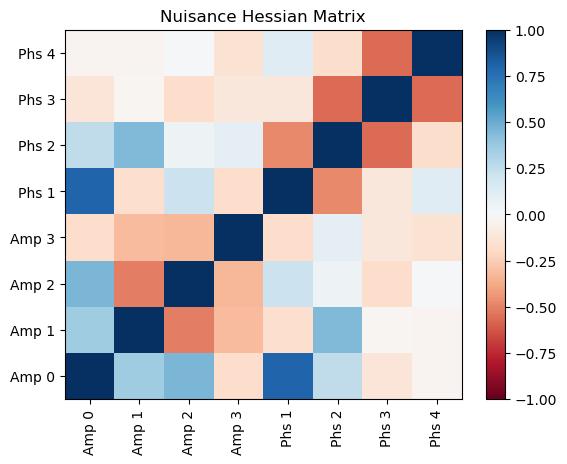

In [6]:

amp_modes=np.arange(0,4)
phs_modes=np.arange(1,5)
modes=len(amp_modes)+len(phs_modes)
#print(len(amp_modes))
#print(modes)

path="/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/"
ampamp = np.loadtxt(path+"/AmpAmp_widths.txt")
phsphs = np.loadtxt(path+"/PhsPhs_widths.txt")
ampphs = np.loadtxt(path+"/AmpPhs_widths.txt")
M=np.ones((modes,modes))
for i in amp_modes:
    for j in amp_modes:
        if j>i:
            mask=(ampamp[:,0]==i)*(ampamp[:,1]==j)
            M[i][j]=ampamp[mask][0][4]-ampamp[mask][0][2]  
    #print(M,"\n")   
    for j in phs_modes:
            mask=(ampphs[:,0]==i)*(ampphs[:,1]==j)
            M[i][len(amp_modes)+j-1]=ampphs[mask][0][4]-ampphs[mask][0][2]  
for i in phs_modes:
    for j in phs_modes:
        if j>i:
            mask=(phsphs[:,0]==i)*(phsphs[:,1]==j)
            M[len(amp_modes)+i-1][len(amp_modes)+j-1]=phsphs[mask][0][4]-phsphs[mask][0][2]
            
(row,column)=np.shape(M) 
B=np.ones((modes,modes))
#print(M,"\n")

for i in range(0,row):
    for j in range(0,column):
        if i!=j:
            M[i][j]=M[i][j]**-2-1
    for j in range(0,i):
        M[i][j]=M[j][i]
        
Cov=np.linalg.inv(M)  
np.savetxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/Hessian.txt",M) 
np.savetxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/Covariance.txt",Cov)            
#print(M)
print("det_M= ",np.linalg.det(M))
X=['Amp 0','Amp 1','Amp 2','Amp 3','Phs 1','Phs 2','Phs 3','Phs 4']
Y=['Amp 0','Amp 1','Amp 2','Amp 3','Phs 1','Phs 2','Phs 3','Phs 4']
Y=plt.pcolormesh(X,Y,M,cmap='RdBu',vmin=-1,vmax=1)
plt.colorbar(Y)
plt.title("Nuisance Hessian Matrix")
plt.xticks(rotation=90)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

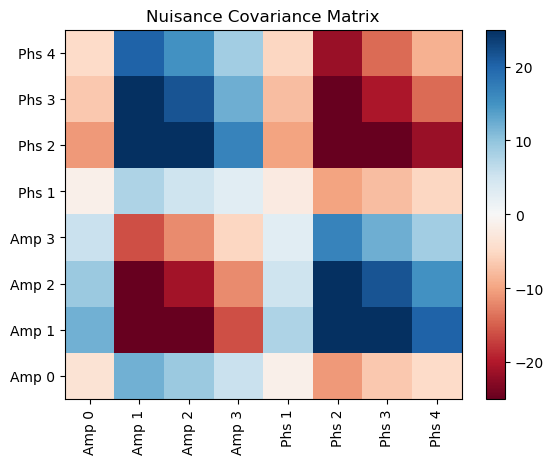

In [7]:
Cov=np.linalg.inv(M)
X=['Amp 0','Amp 1','Amp 2','Amp 3','Phs 1','Phs 2','Phs 3','Phs 4']
Y=['Amp 0','Amp 1','Amp 2','Amp 3','Phs 1','Phs 2','Phs 3','Phs 4']
Z=plt.pcolormesh(X,Y,Cov,cmap='RdBu',vmin=-25,vmax=25)
plt.colorbar(Z)
plt.title("Nuisance Covariance Matrix")
plt.xticks(rotation=90)

det_M=  0.004018591212870457


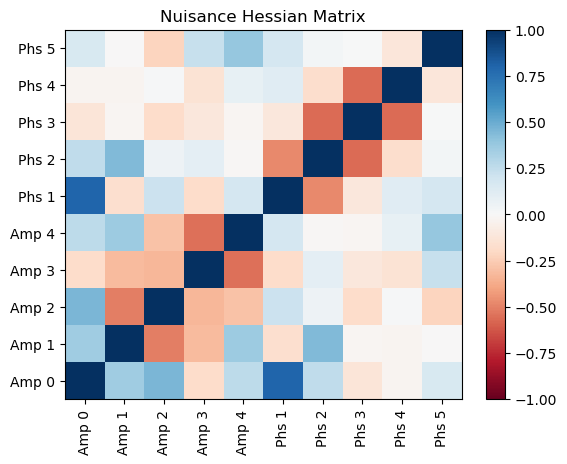

In [20]:

amp_modes=np.arange(0,5)
phs_modes=np.arange(1,6)
modes=len(amp_modes)+len(phs_modes)
#print(len(amp_modes))
#print(modes)

path="/data/user/anegi/ppc/LLHs/spice_ftp-v2/widths/"
ampamp = np.loadtxt(path+"/AmpAmp_widths.txt")
phsphs = np.loadtxt(path+"/PhsPhs_widths.txt")
ampphs = np.loadtxt(path+"/AmpPhs_widths.txt")
M=np.ones((modes,modes))
for i in amp_modes:
    for j in amp_modes:
        if j>i:
            mask=(ampamp[:,0]==i)*(ampamp[:,1]==j)
            M[i][j]=ampamp[mask][0][4]-ampamp[mask][0][2]  
    #print(M,"\n")   
    for j in phs_modes:
            mask=(ampphs[:,0]==i)*(ampphs[:,1]==j)
            M[i][len(amp_modes)+j-1]=ampphs[mask][0][4]-ampphs[mask][0][2]  
for i in phs_modes:
    for j in phs_modes:
        if j>i:
            mask=(phsphs[:,0]==i)*(phsphs[:,1]==j)
            M[len(amp_modes)+i-1][len(amp_modes)+j-1]=phsphs[mask][0][4]-phsphs[mask][0][2]
            
(row,column)=np.shape(M) 
B=np.ones((modes,modes))
#print(M,"\n")

for i in range(0,row):
    for j in range(0,column):
        if i!=j:
            M[i][j]=M[i][j]**-2-1
    for j in range(0,i):
        M[i][j]=M[j][i]
        
Cov=np.linalg.inv(M)  
np.savetxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/Hessian_3.txt",M) 
np.savetxt("/data/user/anegi/ppc/LLHs/spice_ftp-v2/Covariance_3.txt",Cov)            
#print(M)
print("det_M= ",np.linalg.det(M))
X=['Amp 0','Amp 1','Amp 2','Amp 3','Amp 4','Phs 1','Phs 2','Phs 3','Phs 4','Phs 5']
Y=['Amp 0','Amp 1','Amp 2','Amp 3','Amp 4','Phs 1','Phs 2','Phs 3','Phs 4','Phs 5']
Z=plt.pcolormesh(X,Y,M,cmap='RdBu',vmin=-1,vmax=1)
plt.colorbar(Z)
plt.title("Nuisance Hessian Matrix")
plt.xticks(rotation=90)
plt.savefig("./Hessian.png")

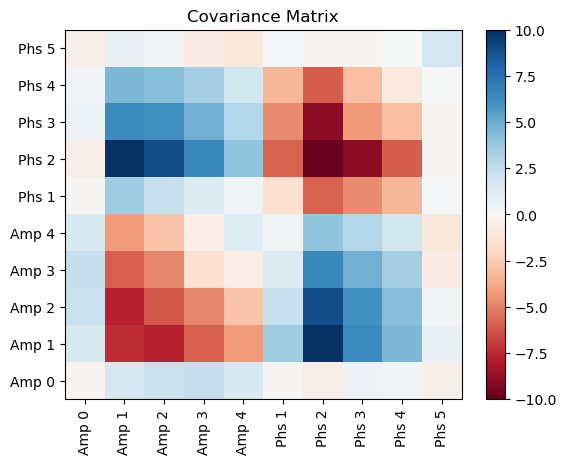

In [22]:
Z=plt.pcolormesh(X,Y,Cov,cmap='RdBu',vmin=-10,vmax=10)
plt.colorbar(Z)
plt.title("Covariance Matrix")
plt.xticks(rotation=90)
plt.savefig("./Covariance.png")